<a href="https://colab.research.google.com/github/charlesbest99/ml/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 불러오기

In [ ]:
import pandas as pd
titanic_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


결측치 확인

In [ ]:
print(titanic_train.isnull().sum())
print("-"*20)
print(titanic_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
print(titanic_train.info())
print("-"*40)
print(titanic_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

# 결측치 처리

Cabin 컬럼은 결측치가 전체의 50% 이상을 차지하므로 컬럼 전체를 제거

train의 Embarked 컬럼은 결측치가 2개 뿐이므로 최빈값 대체

test의 Fare 컬럼도 1개 뿐이므로 중위값 대체

Age 컬럼은 중위값으로 대체

In [ ]:
train_clean = titanic_train.copy()
test_clean = titanic_test.copy()

train_clean.drop(['Cabin'], axis=1, inplace=True)
test_clean.drop(['Cabin'], axis=1, inplace=True)

train_clean['Embarked'].fillna(train_clean['Embarked'].mode()[0], inplace=True)
test_clean['Fare'].fillna(test_clean['Fare'].median(), inplace=True)

train_clean['Age'].fillna(train_clean['Age'].median(), inplace=True)
test_clean['Age'].fillna(test_clean['Age'].median(), inplace=True)

In [ ]:
print(train_clean.isnull().sum())
print("-"*20)
print(test_clean.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
--------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
print(train_clean.info())
print("-"*20)
print(test_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-nul

훈련, 테스트 세트 만들기 (train.cvs의 데이터만 사용)

In [ ]:
# object 컬럼 원핫 인코딩
titanic_input = pd.get_dummies(train_clean, columns=['Sex'])
titanic_input = pd.get_dummies(titanic_input, columns=['Embarked'])
titanic_input.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [ ]:
titanic_input = titanic_input[['Pclass', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].to_numpy()
titanic_target = train_clean['Survived'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    titanic_input, titanic_target, stratify=titanic_target, random_state=201935223)

In [ ]:
print(train_input.shape, test_input.shape)

(668, 10) (223, 10)


정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# SGD 분류

In [ ]:
import numpy as np
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', random_state=201935223)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 100):
  sc.partial_fit(train_scaled, train_target, classes=classes)

  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

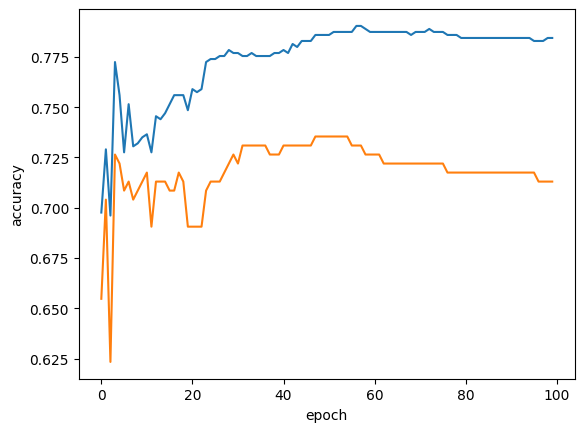

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

epoch 10이 적절

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=10, tol=None, random_state=201935223)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.6976047904191617
0.672645739910314


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=10, tol=None, random_state=201935223)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7200598802395209
0.6771300448430493


데이터의 양이 많지 않으므로 기본값인 25%가 아닌 20%로 테스트 세트를 나누어 다시 시도

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    titanic_input, titanic_target, test_size=0.2, stratify=titanic_target, random_state=201935223)
print(train_input.shape, test_input.shape)

(712, 10) (179, 10)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
sc = SGDClassifier(loss='log_loss', random_state=201935223)

train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 200):
  sc.partial_fit(train_scaled, train_target, classes=classes)

  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

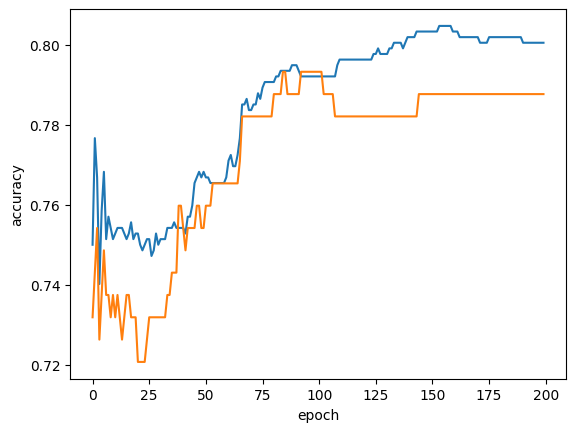

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

epoch 105 정도가 적절

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=105, tol=None, random_state=201935223)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8103932584269663
0.7821229050279329


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=105, tol=None, random_state=201935223)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8047752808988764
0.776536312849162


그리드 서치로 하이퍼파라미터 최적값 탐색

In [ ]:
from sklearn .model_selection import GridSearchCV

params = {'max_iter': range(1, 300, 1),
          'loss': ['log_loss', 'hinge']}

gs = GridSearchCV(SGDClassifier(tol=None, random_state=201935223), params, n_jobs=-1)
gs.fit(train_scaled, train_target)

GridSearchCV(estimator=SGDClassifier(random_state=201935223, tol=None),
             n_jobs=-1,
             param_grid={'loss': ['log_loss', 'hinge'],
                         'max_iter': range(1, 300)})

In [ ]:
print(gs.best_params_)

{'loss': 'hinge', 'max_iter': 236}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8090416625627894


In [ ]:
dt = gs.best_estimator_
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.7963483146067416
0.7821229050279329


위에서 loss='log_loss', max_iter=105 로 훈련했을 때와 큰차이가 없음

# 결정 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=201935223)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9831460674157303
0.7932960893854749


과대적합 (규제 필요)

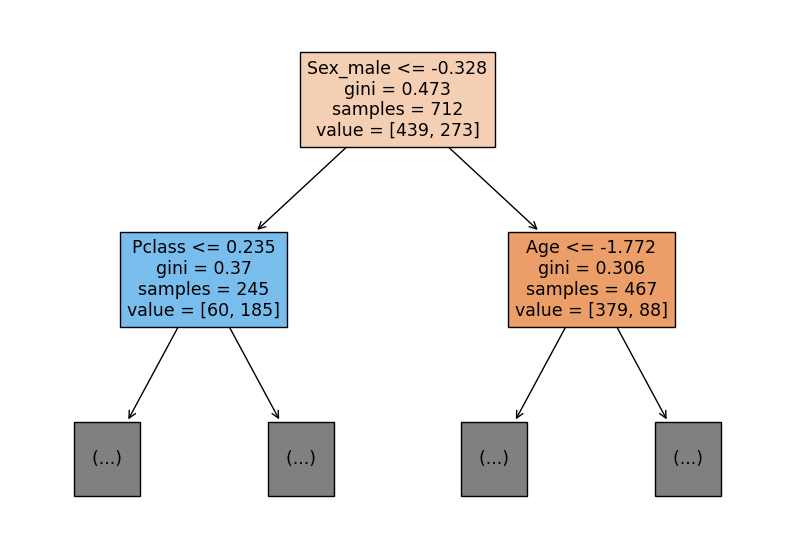

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['Pclass', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])
plt.show()

그리드 서치로 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=201935223), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=201935223),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
print(gs.best_params_)

{'max_depth': 8, 'min_impurity_decrease': 0.0009000000000000001, 'min_samples_split': 2}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8286811779769525


In [ ]:
dt = gs.best_estimator_
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8862359550561798
0.7932960893854749


과대적합

랜덤 서치로 하이퍼파라미터 튜닝

In [ ]:
from scipy.stats import uniform, randint

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25)}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=201935223), params,
                        n_iter=100, n_jobs=-1, random_state=201935223)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=201935223),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cb998c80340>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cb998c83d90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cb998c81930>},
                   random_state=201935223)

In [ ]:
print(gs.best_params_)

{'max_depth': 48, 'min_impurity_decrease': 0.0008894647386694752, 'min_samples_split': 6}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8217078695951935


In [ ]:
dt = gs.best_estimator_
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9115168539325843
0.776536312849162


과대적합

# 랜덤 포레스트

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=201935223)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9859568957543242 0.8047769132276175


In [ ]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.08712332 0.13870289 0.14569088 0.25709306 0.04758039 0.03624336
 0.25436791 0.01427044 0.00694298 0.01198477]


oob 샘플

In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=201935223)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8075842696629213


# 히스토그램 기반 그레이디언트 부스팅

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=201935223)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.947333271667746 0.81185856397124


In [ ]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
# 훈련세트에서
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=201935223, n_jobs=-1)
print(result.importances_mean)

[0.10379213 0.22963483 0.00070225 0.12640449 0.02738764 0.01643258
 0.12640449 0.00772472 0.00182584 0.01039326]


In [ ]:
# 테스트세트에서
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.06648045 0.17877095 0.         0.06536313 0.01675978 0.00782123
 0.03240223 0.00949721 0.00502793 0.01061453]


In [ ]:
hgb.score(test_input, test_target)

0.7988826815642458

## 특성 확장을 한 데이터로 다시 해보기

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
print(test_poly.shape)

(712, 65)
(179, 65)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# SGD 분류

In [ ]:
sc = SGDClassifier(loss='log_loss', random_state=201935223)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)

  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

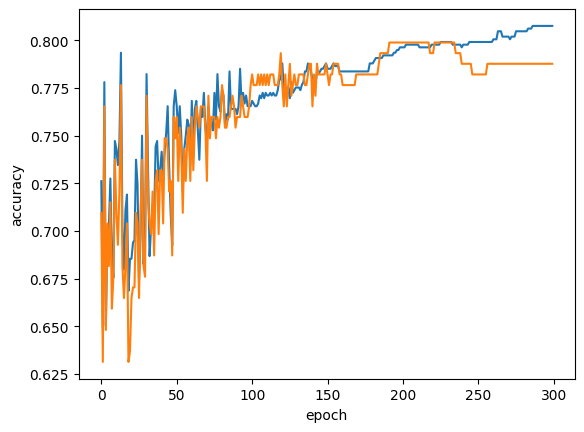

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

epoch 240 정도가 적절

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=240, tol=None, random_state=201935223)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8075842696629213
0.7486033519553073


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=240, tol=None, random_state=201935223)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8033707865168539
0.770949720670391


그리드 서치로 하이퍼파라미터 최적값 탐색

In [ ]:
from sklearn .model_selection import GridSearchCV

params = {'max_iter': range(1, 300, 1),
          'loss': ['log_loss', 'hinge']}

gs = GridSearchCV(SGDClassifier(tol=None, random_state=201935223), params, n_jobs=-1)
gs.fit(train_scaled, train_target)

GridSearchCV(estimator=SGDClassifier(random_state=201935223, tol=None),
             n_jobs=-1,
             param_grid={'loss': ['log_loss', 'hinge'],
                         'max_iter': range(1, 300)})

In [ ]:
print(gs.best_params_)

{'loss': 'hinge', 'max_iter': 272}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8160642174726682


In [ ]:
dt = gs.best_estimator_
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8258426966292135
0.776536312849162


위의 결과보다 좋은 성능 획득

but 특성 확장을 안한 데이터를 사용했을 때와는 비슷한 성능

# 결정 트리

그리드 서치로 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=201935223), params, n_jobs=-1)
gs.fit(train_poly, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=201935223),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
print(gs.best_params_)

{'max_depth': 6, 'min_impurity_decrease': 0.0008, 'min_samples_split': 2}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.818851570964247


In [ ]:
dt = gs.best_estimator_
dt.fit(train_poly, train_target)

print(dt.score(train_poly, train_target))
print(dt.score(test_poly, test_target))

0.8904494382022472
0.8100558659217877


랜덤 서치로 하이퍼파라미터 튜닝

In [ ]:
from scipy.stats import uniform, randint

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25)}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=201935223), params,
                        n_iter=100, n_jobs=-1, random_state=201935223)
gs.fit(train_poly, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=201935223),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cb9997a60e0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cb9998cd690>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cb9998cd510>},
                   random_state=201935223)

In [ ]:
print(gs.best_params_)

{'max_depth': 34, 'min_impurity_decrease': 0.0010821258265555052, 'min_samples_split': 24}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8061952132374668


In [ ]:
dt = gs.best_estimator_
dt.fit(train_poly, train_target)

print(dt.score(train_poly, train_target))
print(dt.score(test_poly, test_target))

0.8778089887640449
0.8100558659217877


그리드 서치와 랜덤 서치로 찾은 모델 모두 특성 확장을 안한 데이터를 사용했을 때보다 성능 향상

# 랜덤 포레스트

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=201935223)
scores = cross_validate(rf, train_poly, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9859568957543242 0.8132079188417217


In [ ]:
rf.fit(train_poly, train_target)
print(rf.feature_importances_)

[0.02481673 0.01298816 0.02686331 0.03989674 0.00514554 0.00207116
 0.04135859 0.00132847 0.00108736 0.00141249 0.0161217  0.03605674
 0.04009512 0.0488543  0.00965028 0.0061813  0.03985281 0.00289333
 0.0012643  0.01737361 0.03261453 0.         0.03462776 0.00318446
 0.00400762 0.04779262 0.00151607 0.00026127 0.00358271 0.02868787
 0.09633349 0.00210184 0.00166888 0.04653291 0.00121804 0.00058542
 0.00747851 0.04071123 0.01246409 0.01064062 0.05598223 0.00791525
 0.0044696  0.0293404  0.0079365  0.00593887 0.01522975 0.00152784
 0.00138868 0.00509948 0.00471093 0.01011356 0.00269915 0.00113509
 0.00409728 0.04218445 0.01259719 0.00322082 0.02794488 0.00225062
 0.         0.         0.00086652 0.         0.00202895]


oob 샘플

In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=201935223)

rf.fit(train_poly, train_target)
print(rf.oob_score_)

0.8089887640449438


특성 확장 전 보다 성능 향상

## 히스토그램 기반 그레이디언트 부스팅

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=201935223)
scores = cross_validate(hgb, train_poly, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9817445194709092 0.7991726583275879


In [ ]:
from sklearn.inspection import permutation_importance

hgb.fit(train_poly, train_target)
# 훈련세트에서
result = permutation_importance(hgb, train_poly, train_target, n_repeats=10,
                                random_state=201935223, n_jobs=-1)
print(result.importances_mean)

[ 1.82584270e-02  0.00000000e+00  0.00000000e+00  3.75000000e-02
  0.00000000e+00  0.00000000e+00  3.84831461e-02  0.00000000e+00
  0.00000000e+00 -5.61797753e-04  0.00000000e+00  0.00000000e+00
  1.12359551e-03  5.07022472e-02  5.61797753e-04  8.42696629e-04
  4.28370787e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.82584270e-03  0.00000000e+00
  2.66853933e-03  6.85393258e-02 -1.40449438e-04  0.00000000e+00
  9.83146067e-04  0.00000000e+00  1.43117978e-01 -1.40449438e-04
  0.00000000e+00  1.62921348e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.12921348e-03  8.00561798e-03
  4.95786517e-02  3.23033708e-03  3.08988764e-03  2.40168539e-02
  0.00000000e+00  1.54494382e-03  3.39887640e-02  0.00000000e+00
  0.00000000e+00 -2.80898876e-04  0.00000000e+00  2.10674157e-03
  0.00000000e+00  0.00000000e+00  1.26404494e-03  0.00000000e+00
  1.82584270e-03  1.40449438e-03  2.92134831e-02  0.00000000e+00
  0.00000000e+00  0.00000

In [ ]:
# 테스트세트에서
result = permutation_importance(hgb, test_poly, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[ 0.0273743  -0.00223464  0.         -0.00502793 -0.00055866  0.
 -0.01396648  0.          0.          0.          0.         -0.00335196
 -0.00335196  0.01452514  0.00335196 -0.0027933  -0.02178771  0.
  0.          0.          0.          0.         -0.0150838   0.
 -0.01061453  0.03687151 -0.00111732  0.         -0.0027933   0.
  0.11843575  0.          0.         -0.01843575  0.          0.
  0.          0.         -0.00502793 -0.00223464 -0.01731844 -0.00726257
  0.         -0.00558659  0.         -0.00167598  0.01117318  0.
  0.          0.00167598  0.          0.00223464  0.          0.
 -0.00111732  0.         -0.00223464  0.00446927  0.00223464  0.
  0.          0.          0.          0.          0.        ]


In [ ]:
hgb.score(test_poly, test_target)

0.7821229050279329